# Dicionário de dados

 \# | Variável | Descrição |Tipo do dado
----|----------|-----------|--------------
 01 | **id** | Identificador único da pegada | Qualitativo
 02 | **qtde_regioes** | Quantidade de regiões encontradas na segmentação da pegada (2 para veado; 5 para coiote e lince)| Quantitativo
 03 | **area** | Área total da pegada | Quantitativo
 04 | **perimetro** | Perímetro total da pegada | Quantitativo
 05 | **circularidade_almofada** | Variável que analisa o quão próximo a almofada se assemelha a um circulo perfeito (mais proximo de 1 = quase circulo perfeito) | Quantitativo
 06 | **especie** | Variável alvo que informa qual a espécie do animal | Qualitativo


# Importando as bibliotecas

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from scipy import stats
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Lendo o dataset

In [4]:
df = pd.read_csv('C:\\Users\\paulo\\Documents\\Faculdade\\TCC\\dev\\Animal-Species-Classifier-Based-Footprints--ML\\animal_footprints_dataset-v2.csv')
df.head()

,id,qtde_regioes,area,perimetro,circularidade_almofada,especie
0,1,5,17612.5,1409.751429,0.420245,coiote
1,2,5,9222.0,1125.293497,0.302666,coiote
2,3,5,5717.0,847.126977,0.598110,coiote
3,4,5,8794.5,1032.281305,0.465044,coiote
4,5,5,8867.5,928.766588,0.765388,coiote


# Entendendo a composição dos dados (EDA)

In [7]:
# Encontrando o tamanho da base de dados
data_shape = df.shape
print(f'O dataframe tem {data_shape[0]} linhas(Registros) e {data_shape[1]} colunas(Atributos)')

O dataframe tem 269 linhas(Registros) e 6 colunas(Atributos)


In [8]:
# Identificando os tipos de dados da base
print('Quantidade de atributos categóricos: ', (df.dtypes == 'object').sum())
print('Quantidade de atributos numéricos: ', (df.dtypes != 'object').sum())
print('\n')
df.dtypes

Quantidade de atributos categóricos:  1
Quantidade de atributos numéricos:  5




id                          int64
qtde_regioes                int64
area                      float64
perimetro                 float64
circularidade_almofada    float64
especie                    object
dtype: object

In [9]:
# Analisando a variavel alvo
print('Quantidade de cada espécie presente na base')
print(df['especie'].value_counts())

Quantidade de cada espécie presente na base
especie
lince-pardo          129
veado-da-virginia    106
coiote                34
Name: count, dtype: int64


In [10]:
# Verificando a existencia de dados nulos
df.isnull().sum()

id                        0
qtde_regioes              0
area                      0
perimetro                 0
circularidade_almofada    0
especie                   0
dtype: int64

In [11]:
# Verificando a distribuição de cada atributo
df.nunique()

id                        269
qtde_regioes                2
area                      266
perimetro                 268
circularidade_almofada    268
especie                     3
dtype: int64

In [12]:
# Analisando a correlação dos atributos em relação ao alvo
anova_especie = stats.f_oneway(df[df['especie'] == 'coiote']['qtde_regioes'],
                                df[df['especie'] == 'lince-pardo']['qtde_regioes'],
                                df[df['especie'] == 'veado-da-virginia']['qtde_regioes'])

print('Teste ANOVA para "especie" em relação a "qtde_regioes":')
print(f'Estatística F: {anova_especie.statistic}')
print(f'P-valor: {anova_especie.pvalue}')
print(f'Possui significância? {"SIM" if anova_especie.pvalue < 0.05 else "NÃO"}')
print('\n###########################################\n')

anova_especie = stats.f_oneway(df[df['especie'] == 'coiote']['area'],
                                df[df['especie'] == 'lince-pardo']['area'],
                                df[df['especie'] == 'veado-da-virginia']['area'])

print('Teste ANOVA para "especie" em relação a "area":')
print(f'Estatística F: {anova_especie.statistic}')
print(f'P-valor: {anova_especie.pvalue}')
print(f'Possui significância? {"SIM" if anova_especie.pvalue < 0.05 else "NÃO"}')
print('\n###########################################\n')

anova_especie = stats.f_oneway(df[df['especie'] == 'coiote']['perimetro'],
                                df[df['especie'] == 'lince-pardo']['perimetro'],
                                df[df['especie'] == 'veado-da-virginia']['perimetro'])

print('Teste ANOVA para "especie" em relação a "perimetro":')
print(f'Estatística F: {anova_especie.statistic}')
print(f'P-valor: {anova_especie.pvalue}')
print(f'Possui significância? {"SIM" if anova_especie.pvalue < 0.05 else "NÃO"}')
print('\n###########################################\n')

anova_especie = stats.f_oneway(df[df['especie'] == 'coiote']['circularidade_almofada'],
                                df[df['especie'] == 'lince-pardo']['circularidade_almofada'],
                                df[df['especie'] == 'veado-da-virginia']['circularidade_almofada'])

print('Teste ANOVA para "especie" em relação a "circularidade_almofada":')
print(f'Estatística F: {anova_especie.statistic}')
print(f'P-valor: {anova_especie.pvalue}')
print(f'Possui significância? {"SIM" if anova_especie.pvalue < 0.05 else "NÃO"}')
print('\n###########################################\n')

Teste ANOVA para "especie" em relação a "qtde_regioes":
Estatística F: inf
P-valor: 0.0
Possui significância? SIM

###########################################

Teste ANOVA para "especie" em relação a "area":
Estatística F: 7.062773048598668
P-valor: 0.0010264703727637056
Possui significância? SIM

###########################################

Teste ANOVA para "especie" em relação a "perimetro":
Estatística F: 39.84598171347081
P-valor: 7.304373907992861e-16
Possui significância? SIM

###########################################

Teste ANOVA para "especie" em relação a "circularidade_almofada":
Estatística F: 89.71637966696684
P-valor: 1.6642983564294666e-30
Possui significância? SIM

###########################################



c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


# Preparação dos dados

## Tratando outliers da variavel "area"

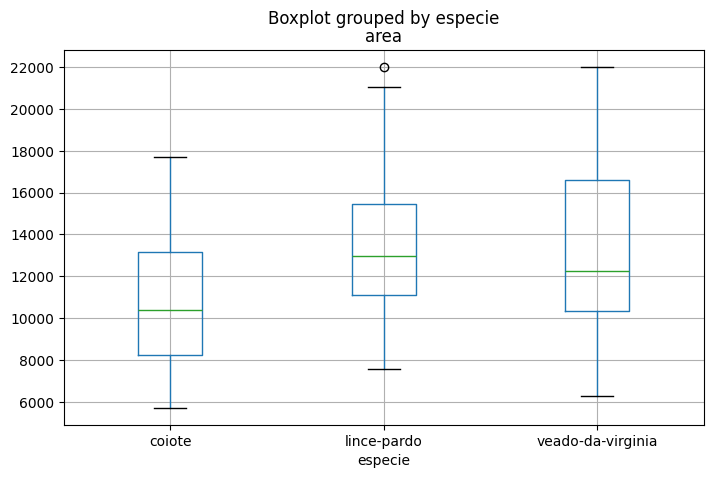

In [13]:
bp = df.boxplot(column=['area'], by='especie', figsize=(8,5))

In [14]:
for especie_value in ['coiote', 'lince-pardo', 'veado-da-virginia']:
    subset = df[df['especie'] == especie_value]
    mask = (df['especie'] == especie_value)

    Q1 = np.percentile(subset['area'], 25)
    Q3 = np.percentile(subset['area'], 75)

    li = Q1 - (1.5 * (Q3 - Q1))
    print(f'O limite inferior para a categoria {especie_value} é: {li}')

    ls = Q3 + (1.5 * (Q3 - Q1))
    print(f'O limite superior para a categoria {especie_value} é: {ls}')

    df.loc[mask, 'area'] = df.loc[mask, 'area'].apply(lambda x: ls if x > ls else x)

O limite inferior para a categoria coiote é: 904.9375
O limite superior para a categoria coiote é: 20477.4375
O limite inferior para a categoria lince-pardo é: 4592.25
O limite superior para a categoria lince-pardo é: 21950.25
O limite inferior para a categoria veado-da-virginia é: 940.6875
O limite superior para a categoria veado-da-virginia é: 25984.1875


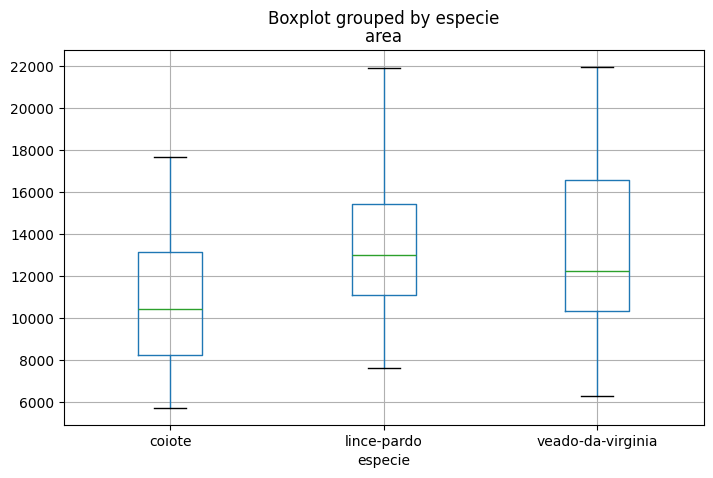

In [15]:
bp = df.boxplot(column=['area'], by='especie', figsize=(8,5))

## Tratando outliers da variavel "perimetro"

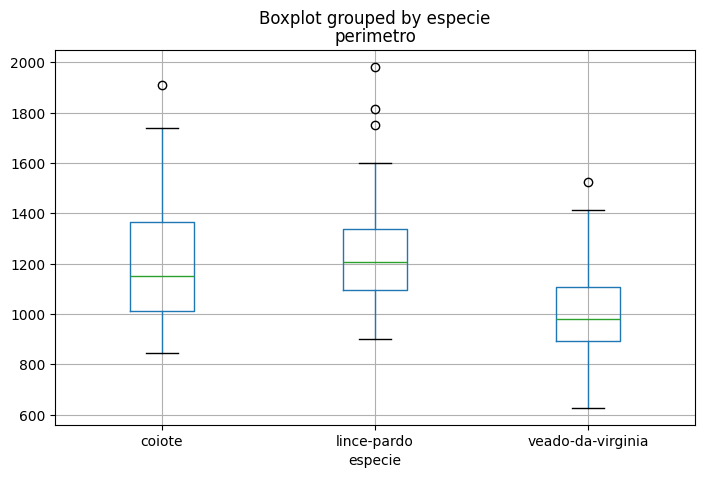

In [16]:
bp = df.boxplot(column=['perimetro'], by='especie', figsize=(8,5))

In [17]:
for especie_value in ['coiote', 'lince-pardo', 'veado-da-virginia']:
    subset = df[df['especie'] == especie_value]
    mask = (df['especie'] == especie_value)

    Q1 = np.percentile(subset['perimetro'], 25)
    Q3 = np.percentile(subset['perimetro'], 75)

    li = Q1 - (1.5 * (Q3 - Q1))
    print(f'O limite inferior para a categoria {especie_value} é: {li}')

    ls = Q3 + (1.5 * (Q3 - Q1))
    print(f'O limite superior para a categoria {especie_value} é: {ls}')

    df.loc[mask, 'perimetro'] = df.loc[mask, 'perimetro'].apply(lambda x: ls if x > ls else x)

O limite inferior para a categoria coiote é: 475.9645539075136
O limite superior para a categoria coiote é: 1902.062083914876
O limite inferior para a categoria lince-pardo é: 733.2173772454267
O limite superior para a categoria lince-pardo é: 1703.394002974033
O limite inferior para a categoria veado-da-virginia é: 571.9496846795079
O limite superior para a categoria veado-da-virginia é: 1427.37816888094


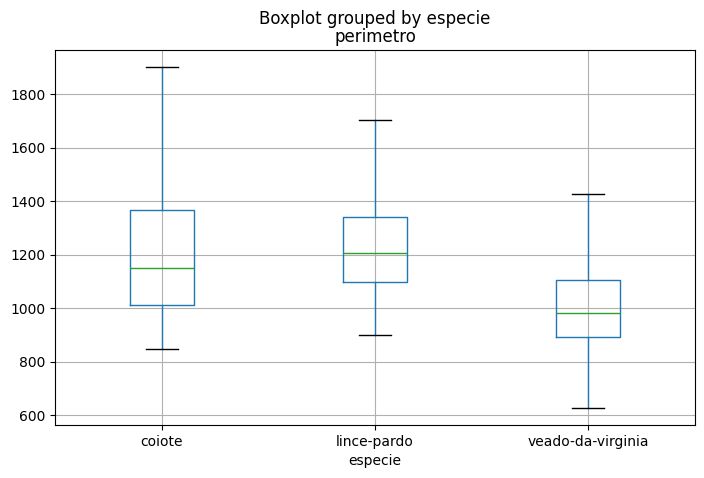

In [18]:
bp = df.boxplot(column=['perimetro'], by='especie', figsize=(8,5))

## Tratando outliers da variavel "circularidade_almofada"

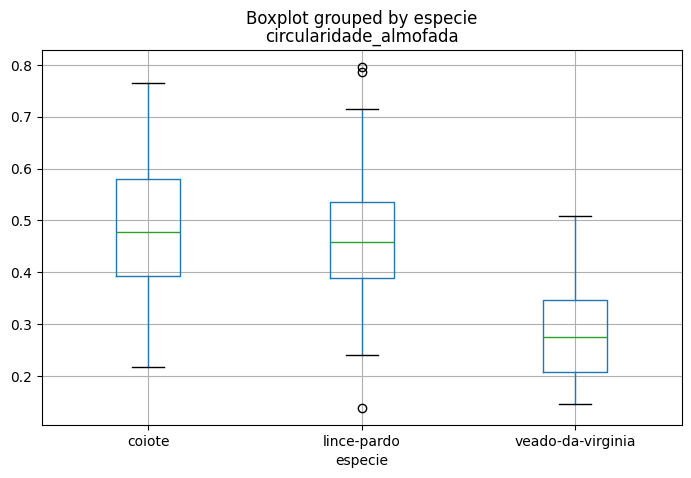

In [19]:
bp = df.boxplot(column=['circularidade_almofada'], by='especie', figsize=(8,5))

In [20]:
for especie_value in ['coiote', 'lince-pardo', 'veado-da-virginia']:
    subset = df[df['especie'] == especie_value]
    mask = (df['especie'] == especie_value)

    Q1 = np.percentile(subset['circularidade_almofada'], 25)
    Q3 = np.percentile(subset['circularidade_almofada'], 75)

    li = Q1 - (1.5 * (Q3 - Q1))
    print(f'O limite inferior para a categoria {especie_value} é: {li}')

    ls = Q3 + (1.5 * (Q3 - Q1))
    print(f'O limite superior para a categoria {especie_value} é: {ls}')

    df.loc[mask, 'circularidade_almofada'] = df.loc[mask, 'circularidade_almofada'].apply(lambda x: ls if x > ls else x)

O limite inferior para a categoria coiote é: 0.11374661690658172
O limite superior para a categoria coiote é: 0.8580168455072652
O limite inferior para a categoria lince-pardo é: 0.16856277843717027
O limite superior para a categoria lince-pardo é: 0.7552594830069824
O limite inferior para a categoria veado-da-virginia é: -0.000429666131743639
O limite superior para a categoria veado-da-virginia é: 0.5549999436804846


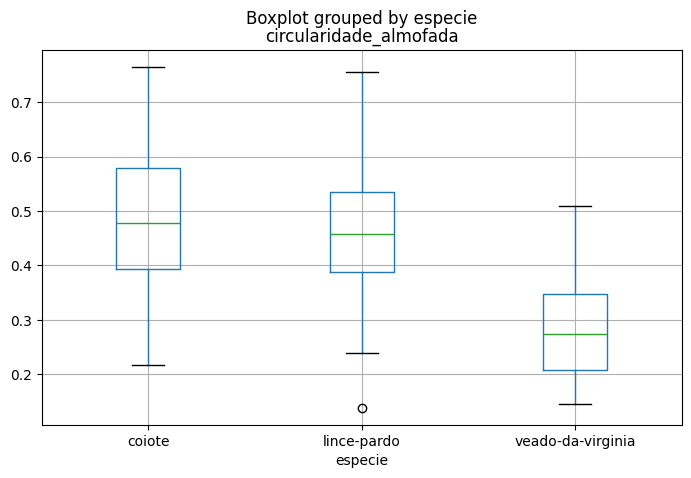

In [21]:
bp = df.boxplot(column=['circularidade_almofada'], by='especie', figsize=(8,5))

In [22]:
for especie_value in ['coiote', 'lince-pardo', 'veado-da-virginia']:
    subset = df[df['especie'] == especie_value]
    mask = (df['especie'] == especie_value)

    Q1 = np.percentile(subset['circularidade_almofada'], 25)
    Q3 = np.percentile(subset['circularidade_almofada'], 75)

    li = Q1 - (1.5 * (Q3 - Q1))
    print(f'O limite inferior para a categoria {especie_value} é: {li}')

    ls = Q3 + (1.5 * (Q3 - Q1))
    print(f'O limite superior para a categoria {especie_value} é: {ls}')

    df.loc[mask, 'circularidade_almofada'] = df.loc[mask, 'circularidade_almofada'].apply(lambda x: ls if x < li else x)

O limite inferior para a categoria coiote é: 0.11374661690658172
O limite superior para a categoria coiote é: 0.8580168455072652
O limite inferior para a categoria lince-pardo é: 0.16856277843717027
O limite superior para a categoria lince-pardo é: 0.7552594830069824
O limite inferior para a categoria veado-da-virginia é: -0.000429666131743639
O limite superior para a categoria veado-da-virginia é: 0.5549999436804846


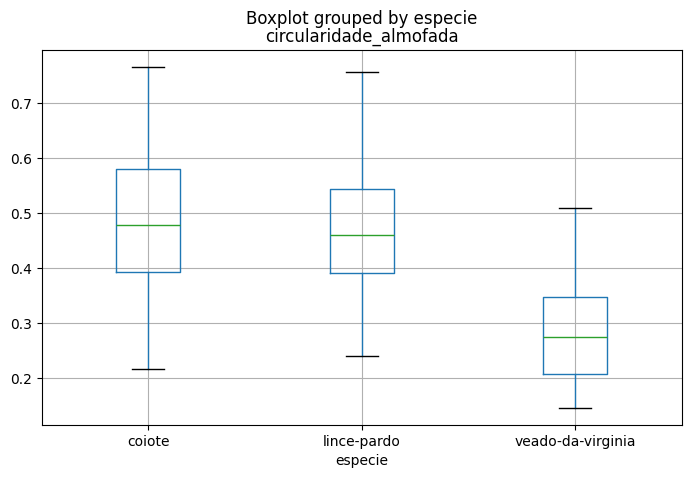

In [23]:
bp = df.boxplot(column=['circularidade_almofada'], by='especie', figsize=(8,5))

## Normalizando os atributos quantitativos

In [24]:
qtde_regioes_min = np.min(df['qtde_regioes'])
qtde_regioes_max = np.max(df['qtde_regioes'])

area_min = np.min(df['area'])
area_max = np.max(df['area'])

perimetro_min = np.min(df['perimetro'])
perimetro_max = np.max(df['perimetro'])

df['NORM_qtde_regioes'] = df['qtde_regioes'].apply(lambda x: (x - qtde_regioes_min) / (qtde_regioes_max - qtde_regioes_min))

df['NORM_area'] = df['area'].apply(lambda x: (x - area_min) / (area_max - area_min))

df['NORM_perimetro'] = df['perimetro'].apply(lambda x: (x - perimetro_min) / (perimetro_max - perimetro_min))

In [25]:
df

,id,qtde_regioes,area,perimetro,circularidade_almofada,especie,NORM_qtde_regioes,NORM_area,NORM_perimetro
0,1,5,17612.5,1409.751429,0.420245,coiote,1.0,0.731131,0.613512
1,2,5,9222.0,1125.293497,0.302666,coiote,1.0,0.215427,0.390198
2,3,5,5717.0,847.126977,0.598110,coiote,1.0,0.000000,0.171824
3,4,5,8794.5,1032.281305,0.465044,coiote,1.0,0.189152,0.317179
4,5,5,8867.5,928.766588,0.765388,coiote,1.0,0.193639,0.235915
...,...,...,...,...,...,...,...,...,...
264,265,2,9401.0,654.357426,0.432804,veado-da-virginia,0.0,0.226429,0.020490
265,266,2,18152.5,1071.737149,0.262159,veado-da-virginia,0.0,0.764321,0.348154
266,267,2,12194.5,904.399055,0.257337,veado-da-virginia,0.0,0.398125,0.216785
267,268,2,11161.5,1027.168609,0.237686,veado-da-virginia,0.0,0.334634,0.313165


Como a circularidade da almofada ja foi criada de forma normalizada, não foi aplicado o pré-processamento.

## Manipulando o atributo alvo

In [26]:
# Mapear as espécies para os valores desejados
mapeamento = {'coiote': 0, 'lince-pardo': 1, 'veado-da-virginia': 2}

# Atribuir os valores mapeados à coluna 'especie'
df['especie'] = df['especie'].replace(mapeamento)
df

C:\Users\paulo\AppData\Local\Temp\ipykernel_6336\1718259987.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['especie'] = df['especie'].replace(mapeamento)


,id,qtde_regioes,area,perimetro,circularidade_almofada,especie,NORM_qtde_regioes,NORM_area,NORM_perimetro
0,1,5,17612.5,1409.751429,0.420245,0,1.0,0.731131,0.613512
1,2,5,9222.0,1125.293497,0.302666,0,1.0,0.215427,0.390198
2,3,5,5717.0,847.126977,0.598110,0,1.0,0.000000,0.171824
3,4,5,8794.5,1032.281305,0.465044,0,1.0,0.189152,0.317179
4,5,5,8867.5,928.766588,0.765388,0,1.0,0.193639,0.235915
...,...,...,...,...,...,...,...,...,...
264,265,2,9401.0,654.357426,0.432804,2,0.0,0.226429,0.020490
265,266,2,18152.5,1071.737149,0.262159,2,0.0,0.764321,0.348154
266,267,2,12194.5,904.399055,0.257337,2,0.0,0.398125,0.216785
267,268,2,11161.5,1027.168609,0.237686,2,0.0,0.334634,0.313165


## Dividindo o dataset em treino e teste

In [27]:
new_df = df[[
    'especie',
    'circularidade_almofada',
    'NORM_qtde_regioes',
    'NORM_area',
    'NORM_perimetro'
]]

new_df

,especie,circularidade_almofada,NORM_qtde_regioes,NORM_area,NORM_perimetro
0,0,0.420245,1.0,0.731131,0.613512
1,0,0.302666,1.0,0.215427,0.390198
2,0,0.598110,1.0,0.000000,0.171824
3,0,0.465044,1.0,0.189152,0.317179
4,0,0.765388,1.0,0.193639,0.235915
...,...,...,...,...,...
264,2,0.432804,0.0,0.226429,0.020490
265,2,0.262159,0.0,0.764321,0.348154
266,2,0.257337,0.0,0.398125,0.216785
267,2,0.237686,0.0,0.334634,0.313165


In [28]:
cols = list(new_df.columns)

idx_alvo = cols.index('especie')
x = new_df.iloc[:, idx_alvo+1:]
y = new_df['especie']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify=y)

## Balanceando o atributo alvo no dataset base

In [29]:
# Separando o atributo alvo dos demais
x = new_df.drop('especie', axis=1)
y = new_df['especie']

### Analisando as distribuições do alvo nas diferentes bases

In [30]:
# Contando os valores em cada classe
y.value_counts()

especie
1    129
2    106
0     34
Name: count, dtype: int64

In [31]:
# Verificando a proporção
(y.value_counts()/y.shape[0]) * 100

especie
1    47.955390
2    39.405204
0    12.639405
Name: count, dtype: float64

In [32]:
# Verificando a proporção do alvo na base de treino
(y_train.value_counts()/y_train.shape[0]) * 100

especie
1    47.872340
2    39.361702
0    12.765957
Name: count, dtype: float64

In [33]:
# Contando os valores em cada classe na base de treino
y_train.value_counts()

especie
1    90
2    74
0    24
Name: count, dtype: int64

In [34]:
# Verificando a proporção do alvo na base de teste
(y_test.value_counts()/y_test.shape[0]) * 100

especie
1    48.148148
2    39.506173
0    12.345679
Name: count, dtype: float64

In [35]:
# Contando os valores em cada classe na base de teste
y_test.value_counts()

especie
1    39
2    32
0    10
Name: count, dtype: int64

### Aplicando o balanceamento por undersample na base de treino


In [36]:
# Aplicando o RandomUnderSampler
rus = RandomUnderSampler(random_state = 42)
x_rus, y_rus = rus.fit_resample(x_train, y_train)

In [37]:
# Contando os valores balanceados em cada classe na base de treino
y_rus.value_counts()

especie
0    24
1    24
2    24
Name: count, dtype: int64

In [38]:
# Verificando a proporção do alvo balanceado na base de treino
(y_rus.value_counts()/y_rus.shape[0]) * 100

especie
0    33.333333
1    33.333333
2    33.333333
Name: count, dtype: float64

### Aplicando o balanceamento por oversample

In [39]:
# Aplicando o RandomOverSampler
ros = RandomOverSampler(random_state = 42)
x_ros, y_ros = ros.fit_resample(x_train, y_train)

In [40]:
# Contando os valores balanceados em cada classe na base de treino
y_ros.value_counts()

especie
0    90
2    90
1    90
Name: count, dtype: int64

In [41]:
# Verificando a proporção do alvo balanceado na base de treino
(y_ros.value_counts()/y_ros.shape[0]) * 100

especie
0    33.333333
2    33.333333
1    33.333333
Name: count, dtype: float64

# Modelagem dos dados com Machine Learning

## KNN

### Encontrando os melhores hiperparâmetros

In [96]:
knn_model_clf = KNeighborsClassifier()

parametros = {
    'n_neighbors': [2, 3, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'brute'],
    'p': [1.0, 2.0],
    'metric': ['minkowski', 'cityblock', 'Euclidean'],
}

gs = GridSearchCV(estimator=knn_model_clf, param_grid=parametros)
gs.fit(x_train, y_train)

result = pd.DataFrame(gs.cv_results_)
result[['params','rank_test_score','mean_test_score']].sort_values('rank_test_score')

c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base

,params,rank_test_score,mean_test_score
59,"{'algorithm': 'brute', 'metric': 'minkowski', ...",1,0.888620
11,"{'algorithm': 'auto', 'metric': 'minkowski', '...",1,0.888620
56,"{'algorithm': 'brute', 'metric': 'minkowski', ...",3,0.883215
74,"{'algorithm': 'brute', 'metric': 'cityblock', ...",3,0.883215
72,"{'algorithm': 'brute', 'metric': 'cityblock', ...",3,0.883215
...,...,...,...
43,"{'algorithm': 'auto', 'metric': 'Euclidean', '...",65,NaN
44,"{'algorithm': 'auto', 'metric': 'Euclidean', '...",65,NaN
45,"{'algorithm': 'auto', 'metric': 'Euclidean', '...",65,NaN
39,"{'algorithm': 'auto', 'metric': 'Euclidean', '...",65,NaN


In [97]:
gs.best_params_

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 5,
 'p': 2.0,
 'weights': 'distance'}

### Aplicando e avaliando o algoritmo com dados de treino

In [98]:
# Aplicando o algoritmo de classificação com os dados desbalanceados
knn_model_clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', algorithm='auto', p=2.0, weights='distance')
knn_model_clf.fit(x_train, y_train)
y_train_pred = knn_model_clf.predict(x_train)

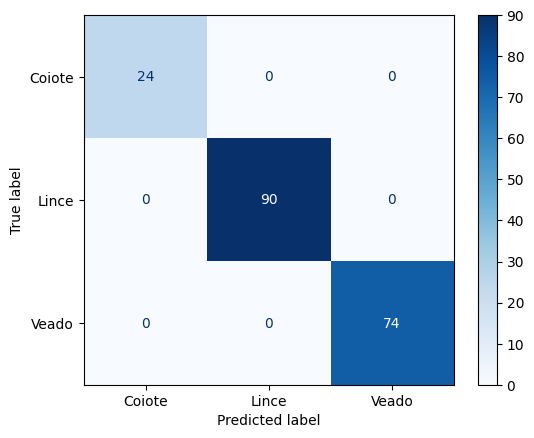

In [99]:
# Calculando a matriz de confusão
cm = metrics.confusion_matrix(y_train, y_train_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Coiote", "Lince", "Veado"])
cm_display.plot(cmap=plt.cm.Blues)

plt.show()

In [100]:
# Analisando as metricas de avaliação
print("Accuracy score: ", metrics.accuracy_score(y_train, y_train_pred))
print("Report: \n", metrics.classification_report(y_train, y_train_pred))

Accuracy score:  1.0
Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00        74

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188



### Aplicando e avaliando o algoritmo com dados de teste

In [101]:
# Aplicando o algoritmo de classificação com os dados desbalanceados
knn_model_clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', algorithm='auto', p=2.0, weights='distance')
knn_model_clf.fit(x_train, y_train)
y_test_pred = knn_model_clf.predict(x_test)

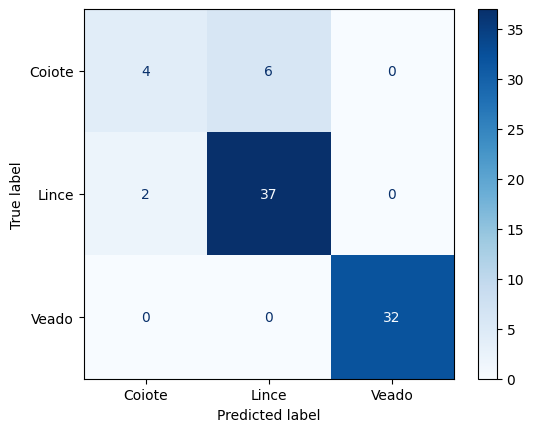

In [102]:
# Calculando a matriz de confusão
cm = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Coiote", "Lince", "Veado"])
cm_display.plot(cmap=plt.cm.Blues)

plt.show()

In [104]:
# Analisando as metricas de avaliação
print("Accuracy score: ", metrics.accuracy_score(y_test, y_test_pred))
print("Report: \n", metrics.classification_report(y_test, y_test_pred))

Accuracy score:  0.9012345679012346
Report: 
               precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.86      0.95      0.90        39
           2       1.00      1.00      1.00        32

    accuracy                           0.90        81
   macro avg       0.84      0.78      0.80        81
weighted avg       0.89      0.90      0.89        81



### Aplicando validação cruzada

In [105]:
knn_model_clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', algorithm='auto', p=2.0, weights='distance')

y_predict = cross_val_predict(knn_model_clf, x, y, cv=10)

print(metrics.classification_report(y, y_predict))

              precision    recall  f1-score   support

           0       0.54      0.21      0.30        34
           1       0.82      0.95      0.88       129
           2       1.00      1.00      1.00       106

    accuracy                           0.88       269
   macro avg       0.79      0.72      0.73       269
weighted avg       0.86      0.88      0.85       269



## SVM

### Encontrando os melhores hiperparâmetros

In [108]:
svm_model_clf = SVC()

parametros = {
    'C': [1.0, 2.0, 3.0, 5.0],
    'kernel': ['linear', 'poly', 'rbf']
}

gs = GridSearchCV(estimator=svm_model_clf, param_grid=parametros)
gs.fit(x_train, y_train)

result = pd.DataFrame(gs.cv_results_)
result[['params','rank_test_score','mean_test_score']].sort_values('rank_test_score')

,params,rank_test_score,mean_test_score
11,"{'C': 5.0, 'kernel': 'rbf'}",1,0.899147
8,"{'C': 3.0, 'kernel': 'rbf'}",2,0.888478
1,"{'C': 1.0, 'kernel': 'poly'}",3,0.888478
4,"{'C': 2.0, 'kernel': 'poly'}",4,0.883357
7,"{'C': 3.0, 'kernel': 'poly'}",4,0.883357
10,"{'C': 5.0, 'kernel': 'poly'}",6,0.878094
0,"{'C': 1.0, 'kernel': 'linear'}",7,0.872404
2,"{'C': 1.0, 'kernel': 'rbf'}",7,0.872404
3,"{'C': 2.0, 'kernel': 'linear'}",7,0.872404
6,"{'C': 3.0, 'kernel': 'linear'}",7,0.872404


In [107]:
gs.best_params_

{'C': 5.0, 'kernel': 'rbf'}

### Aplicando e avaliando o algoritmo com dados de treino

In [110]:
# Aplicando o algoritmo de classificação com os dados desbalanceados
svm_model_clf = SVC(C=5.0, kernel='rbf')
svm_model_clf.fit(x_train, y_train)
y_train_pred = svm_model_clf.predict(x_train)

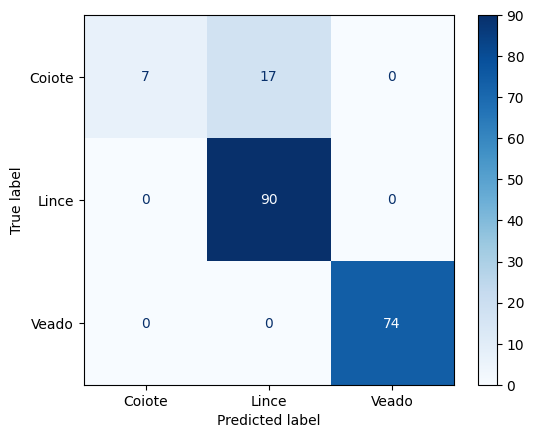

In [111]:
# Calculando a matriz de confusão
cm = metrics.confusion_matrix(y_train, y_train_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Coiote", "Lince", "Veado"])
cm_display.plot(cmap=plt.cm.Blues)

plt.show()

In [115]:
# Analisando as metricas de avaliação
print("Accuracy score: ", metrics.accuracy_score(y_train, y_train_pred))
print("Report: \n", metrics.classification_report(y_train, y_train_pred))

Accuracy score:  0.9095744680851063
Report: 
               precision    recall  f1-score   support

           0       1.00      0.29      0.45        24
           1       0.84      1.00      0.91        90
           2       1.00      1.00      1.00        74

    accuracy                           0.91       188
   macro avg       0.95      0.76      0.79       188
weighted avg       0.92      0.91      0.89       188



### Aplicando e avaliando o algoritmo com dados de teste

In [113]:
# Aplicando o algoritmo de classificação com os dados desbalanceados
svm_model_clf = SVC(C=5.0, kernel='rbf')
svm_model_clf.fit(x_train, y_train)
y_pred = svm_model_clf.predict(x_test)

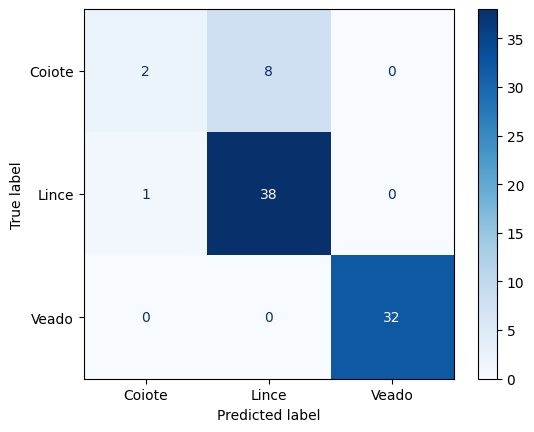

In [114]:
# Calculando a matriz de confusão
cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Coiote", "Lince", "Veado"])
cm_display.plot(cmap=plt.cm.Blues)

plt.show()

In [58]:
# Analisando as metricas de avaliação
print("Accuracy score: ", metrics.accuracy_score(y_test, y_pred))
print("Report: \n", metrics.classification_report(y_test, y_pred))

Accuracy score:  0.8888888888888888
Report: 
               precision    recall  f1-score   support

           0       0.67      0.20      0.31        10
           1       0.83      0.97      0.89        39
           2       1.00      1.00      1.00        32

    accuracy                           0.89        81
   macro avg       0.83      0.72      0.73        81
weighted avg       0.88      0.89      0.86        81



### Aplicando validação cruzada

In [116]:
svm_model_clf = SVC(C=5.0, kernel='rbf')

y_predict = cross_val_predict(svm_model_clf, x, y, cv=10)

print(metrics.classification_report(y, y_predict))

              precision    recall  f1-score   support

           0       0.67      0.18      0.28        34
           1       0.82      0.98      0.89       129
           2       1.00      1.00      1.00       106

    accuracy                           0.88       269
   macro avg       0.83      0.72      0.72       269
weighted avg       0.87      0.88      0.86       269



## Árvore de Decisão

### Encontrando os melhores hiperparâmetros

In [117]:
dt_model_clf = DecisionTreeClassifier()

parametros = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 3, 5, 8],
    'min_samples_leaf': [1, 2, 3, 5, 8]
}

gs = GridSearchCV(estimator=dt_model_clf, param_grid=parametros)
gs.fit(x_train, y_train)

result = pd.DataFrame(gs.cv_results_)
result[['params','rank_test_score','mean_test_score']].sort_values('rank_test_score')

,params,rank_test_score,mean_test_score
132,"{'criterion': 'log_loss', 'max_depth': 5, 'min...",1,0.904836
82,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",1,0.904836
74,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",3,0.899431
24,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",3,0.899431
26,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",3,0.899431
...,...,...,...
103,"{'criterion': 'log_loss', 'max_depth': None, '...",146,0.814225
106,"{'criterion': 'log_loss', 'max_depth': None, '...",147,0.813940
0,"{'criterion': 'gini', 'max_depth': None, 'min_...",148,0.808677
42,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",149,0.803272


In [124]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'splitter': 'best'}

### Aplicando e avaliando o algoritmo com dados de treino

In [126]:
# Aplicando o algoritmo de classificação com os dados desbalanceados
dt_model_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2, splitter='best')
dt_model_clf.fit(x_train, y_train)
y_train_pred = dt_model_clf.predict(x_train)

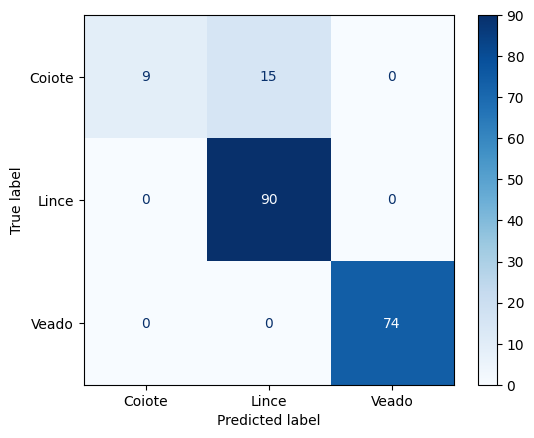

In [127]:
# Calculando a matriz de confusão
cm = metrics.confusion_matrix(y_train, y_train_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Coiote", "Lince", "Veado"])
cm_display.plot(cmap=plt.cm.Blues)

plt.show()

In [129]:
# Analisando as metricas de avaliação
print("Accuracy score: ", metrics.accuracy_score(y_train, y_train_pred))
print("Report: \n", metrics.classification_report(y_train, y_train_pred))

Accuracy score:  0.9202127659574468
Report: 
               precision    recall  f1-score   support

           0       1.00      0.38      0.55        24
           1       0.86      1.00      0.92        90
           2       1.00      1.00      1.00        74

    accuracy                           0.92       188
   macro avg       0.95      0.79      0.82       188
weighted avg       0.93      0.92      0.91       188



### Aplicando e avaliando o algoritmo com dados de teste

In [130]:
# Aplicando o algoritmo de classificação com os dados desbalanceados
dt_model_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2, splitter='best')
dt_model_clf.fit(x_train, y_train)
y_pred = dt_model_clf.predict(x_test)

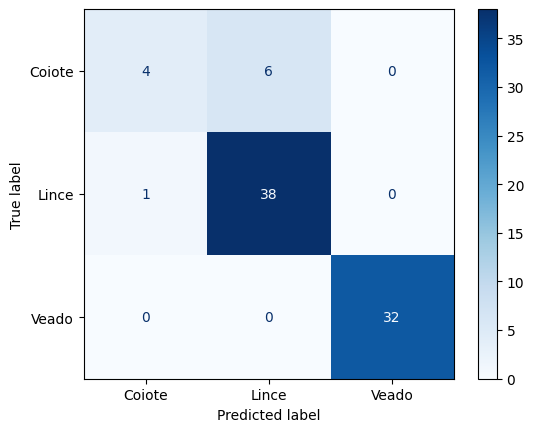

In [131]:
# Calculando a matriz de confusão
cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Coiote", "Lince", "Veado"])
cm_display.plot(cmap=plt.cm.Blues)

plt.show()

In [133]:
# Analisando as metricas de avaliação
print("Accuracy score: ", metrics.accuracy_score(y_test, y_pred))
print("Report: \n", metrics.classification_report(y_test, y_pred))

Accuracy score:  0.9135802469135802
Report: 
               precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.86      0.97      0.92        39
           2       1.00      1.00      1.00        32

    accuracy                           0.91        81
   macro avg       0.89      0.79      0.82        81
weighted avg       0.91      0.91      0.90        81



### Aplicando validação cruzada

In [150]:
dt_model_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2, splitter='best')

y_predict = cross_val_predict(svm_model_clf, x, y, cv=10)

print(metrics.classification_report(y, y_predict))

              precision    recall  f1-score   support

           0       0.67      0.18      0.28        34
           1       0.82      0.98      0.89       129
           2       1.00      1.00      1.00       106

    accuracy                           0.88       269
   macro avg       0.83      0.72      0.72       269
weighted avg       0.87      0.88      0.86       269



## Random Forest

### Encontrando os melhores hiperparâmetros

In [69]:
rf_model_clf = RandomForestClassifier()

parametros = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 2, 3, 5, 8],
    'min_samples_leaf': [1, 2, 3, 5, 8]
}

gs = GridSearchCV(estimator=rf_model_clf, param_grid=parametros)
gs.fit(x_train, y_train)

result = pd.DataFrame(gs.cv_results_)
result[['params','rank_test_score','mean_test_score']].sort_values('rank_test_score')

,params,rank_test_score,mean_test_score
83,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1,0.904694
210,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",1,0.904694
76,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1,0.904694
82,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1,0.904694
84,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",5,0.899431
...,...,...,...
49,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",370,0.867141
170,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",370,0.867141
295,"{'criterion': 'log_loss', 'max_depth': 2, 'min...",370,0.867141
296,"{'criterion': 'log_loss', 'max_depth': 2, 'min...",370,0.867141


In [70]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'n_estimators': 100}

### Aplicando e avaliando o algoritmo com dados de treino

In [135]:
# Aplicando o algoritmo de classificação com os dados desbalanceados
rf_model_clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5, min_samples_leaf=1)
rf_model_clf.fit(x_train, y_train)
y_train_pred = rf_model_clf.predict(x_train)

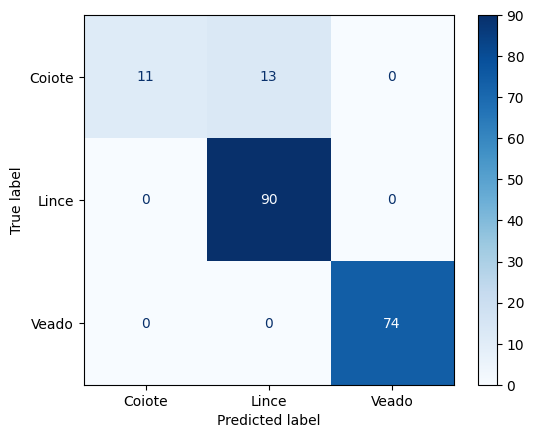

In [151]:
# Calculando a matriz de confusão
cm = metrics.confusion_matrix(y_train, y_train_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Coiote", "Lince", "Veado"])
cm_display.plot(cmap=plt.cm.Blues)

plt.show()

In [145]:
# Analisando as metricas de avaliação
print("Accuracy score: ", metrics.accuracy_score(y_train, y_train_pred))
print("Report: \n", metrics.classification_report(y_train, y_train_pred))

Accuracy score:  0.9308510638297872
Report: 
               precision    recall  f1-score   support

           0       1.00      0.46      0.63        24
           1       0.87      1.00      0.93        90
           2       1.00      1.00      1.00        74

    accuracy                           0.93       188
   macro avg       0.96      0.82      0.85       188
weighted avg       0.94      0.93      0.92       188



### Aplicando e avaliando o algoritmo com dados de teste

In [146]:
# Aplicando o algoritmo de classificação com os dados desbalanceados
rf_model_clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5, min_samples_leaf=1)
rf_model_clf.fit(x_train, y_train)
y_pred = rf_model_clf.predict(x_test)

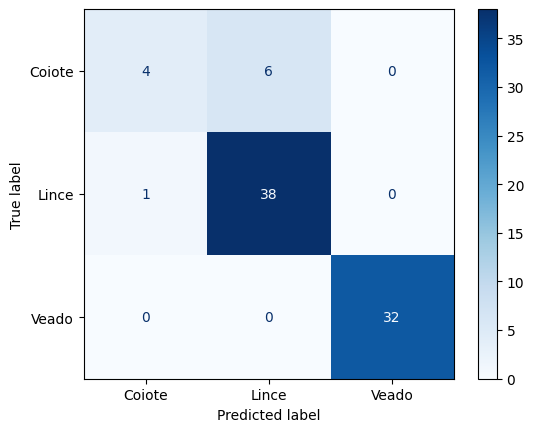

In [147]:
# Calculando a matriz de confusão
cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Coiote", "Lince", "Veado"])
cm_display.plot(cmap=plt.cm.Blues)

plt.show()

In [148]:
# Analisando as metricas de avaliação
print("Accuracy score: ", metrics.accuracy_score(y_test, y_pred))
print("Report: \n", metrics.classification_report(y_test, y_pred))

Accuracy score:  0.9135802469135802
Report: 
               precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.86      0.97      0.92        39
           2       1.00      1.00      1.00        32

    accuracy                           0.91        81
   macro avg       0.89      0.79      0.82        81
weighted avg       0.91      0.91      0.90        81



### Aplicando validação cruzada

In [149]:
rf_model_clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5, min_samples_leaf=1)

y_predict = cross_val_predict(rf_model_clf, x, y, cv=10)

print(metrics.classification_report(y, y_predict))

              precision    recall  f1-score   support

           0       0.71      0.35      0.47        34
           1       0.85      0.96      0.90       129
           2       1.00      1.00      1.00       106

    accuracy                           0.90       269
   macro avg       0.85      0.77      0.79       269
weighted avg       0.89      0.90      0.89       269



## MLP

### Encontrando os melhores hiperparâmetros

In [160]:
mlp_model_clf = MLPClassifier()

parametros = {
    'hidden_layer_sizes': [(100,), (20, 40, 60), (32, 64, 128, 256), (256, 128, 64, 32)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 500]
}

gs = GridSearchCV(estimator=mlp_model_clf, param_grid=parametros)
gs.fit(x_train, y_train)

result = pd.DataFrame(gs.cv_results_)
result[['params','rank_test_score','mean_test_score']].sort_values('rank_test_score')

c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

,params,rank_test_score,mean_test_score
422,"{'activation': 'relu', 'hidden_layer_sizes': (...",1,0.910100
417,"{'activation': 'relu', 'hidden_layer_sizes': (...",1,0.910100
281,"{'activation': 'tanh', 'hidden_layer_sizes': (...",3,0.909957
153,"{'activation': 'logistic', 'hidden_layer_sizes...",4,0.904836
423,"{'activation': 'relu', 'hidden_layer_sizes': (...",5,0.904694
...,...,...,...
188,"{'activation': 'logistic', 'hidden_layer_sizes...",427,0.425605
290,"{'activation': 'tanh', 'hidden_layer_sizes': (...",429,0.410384
184,"{'activation': 'logistic', 'hidden_layer_sizes...",430,0.408535
293,"{'activation': 'tanh', 'hidden_layer_sizes': (...",431,0.372973


In [161]:
gs.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (256, 128, 64, 32),
 'learning_rate_init': 0.01,
 'max_iter': 200,
 'solver': 'lbfgs'}

### Aplicando e avaliando o algoritmo com dados de treino

In [162]:
# Aplicando o algoritmo de classificação com os dados desbalanceados
mlp_model_clf = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), activation='relu', learning_rate_init=0.01, max_iter=200, solver='lbfgs')
mlp_model_clf.fit(x_train, y_train)
y_train_pred = mlp_model_clf.predict(x_train)

c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


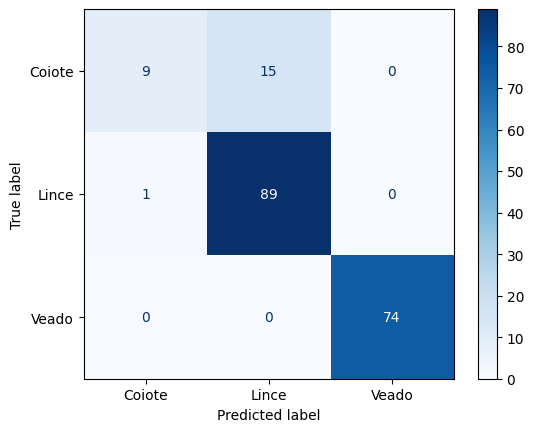

In [163]:
# Calculando a matriz de confusão
cm = metrics.confusion_matrix(y_train, y_train_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Coiote", "Lince", "Veado"])
cm_display.plot(cmap=plt.cm.Blues)

plt.show()

In [166]:
# Analisando as metricas de avaliação
print("Accuracy score: ", metrics.accuracy_score(y_train, y_train_pred))
print("Report: \n", metrics.classification_report(y_train, y_train_pred))

Accuracy score:  0.9148936170212766
Report: 
               precision    recall  f1-score   support

           0       0.90      0.38      0.53        24
           1       0.86      0.99      0.92        90
           2       1.00      1.00      1.00        74

    accuracy                           0.91       188
   macro avg       0.92      0.79      0.82       188
weighted avg       0.92      0.91      0.90       188



### Aplicando e avaliando o algoritmo com dados de teste

In [167]:
# Aplicando o algoritmo de classificação com os dados desbalanceados
mlp_model_clf = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), activation='relu', learning_rate_init=0.01, max_iter=200, solver='lbfgs')
mlp_model_clf.fit(x_train, y_train)
y_pred = mlp_model_clf.predict(x_test)

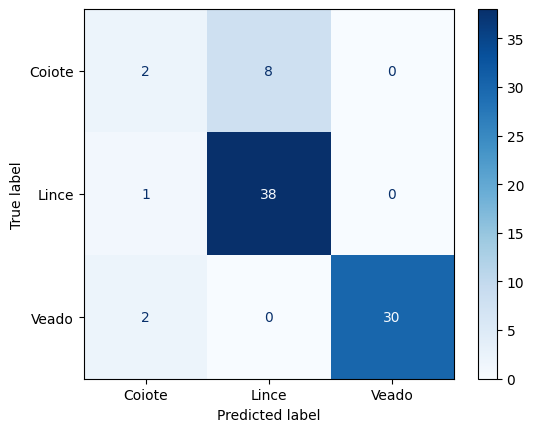

In [168]:
# Calculando a matriz de confusão
cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Coiote", "Lince", "Veado"])
cm_display.plot(cmap=plt.cm.Blues)

plt.show()

In [169]:
# Analisando as metricas de avaliação
print("Accuracy score: ", metrics.accuracy_score(y_test, y_pred))
print("Report: \n", metrics.classification_report(y_test, y_pred))

Accuracy score:  0.8641975308641975
Report: 
               precision    recall  f1-score   support

           0       0.40      0.20      0.27        10
           1       0.83      0.97      0.89        39
           2       1.00      0.94      0.97        32

    accuracy                           0.86        81
   macro avg       0.74      0.70      0.71        81
weighted avg       0.84      0.86      0.85        81



### Aplicando validação cruzada

In [170]:
mlp_model_clf = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), activation='relu', learning_rate_init=0.01, max_iter=200, solver='lbfgs')

y_predict = cross_val_predict(mlp_model_clf, x, y, cv=10)

print(metrics.classification_report(y, y_predict))

c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptr

              precision    recall  f1-score   support

           0       0.62      0.29      0.40        34
           1       0.84      0.95      0.89       129
           2       1.00      1.00      1.00       106

    accuracy                           0.89       269
   macro avg       0.82      0.75      0.76       269
weighted avg       0.87      0.89      0.87       269

